### Setup

download dataset

In [71]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("fmena14/volcanoesvenus")

print("Path to dataset files:", path)

Path to dataset files: /Users/gabrieledurante/.cache/kagglehub/datasets/fmena14/volcanoesvenus/versions/1


In [72]:
import os

files = os.listdir(path)
print(files)

['Volcanoes_train', 'Volcanoes_test']


### Data Preparation

look at the data and do some trasformations

In [73]:
import numpy as np
import pandas as pd

import os
print(os.listdir(path))

np.random.seed(2024)

X_train = pd.read_csv(os.path.join(path, 'volcanoes_train', 'train_images.csv'))
y_train = pd.read_csv(os.path.join(path, 'volcanoes_train', 'train_labels.csv'))
X_test = pd.read_csv(os.path.join(path, 'volcanoes_test', 'test_images.csv'))
y_test = pd.read_csv(os.path.join(path, 'volcanoes_test', 'test_labels.csv'))

['Volcanoes_train', 'Volcanoes_test']


In [74]:
print(X_train.head())
print(y_train.head())

    95  101   99  103  95.1   86   96   89   70  104  ...  111.214  107.329  \
0   91   92   91   89    92   93   96  101  107  104  ...      103       92   
1   87   70   72   74    84   78   93  104  106  106  ...       84       71   
2    0    0    0    0     0    0    0    0    0    0  ...       94       81   
3  114  118  124  119    95  118  105  116  123  112  ...      116      113   
4   79   95   90   82    73   74   77   75   82   87  ...       90       80   

   92.354  89.258  103.379  99.414  117.112  116.103  118.82  96.423  
0      93      95       98     105      104      100      90      81  
1      95     102       94      80       91       80      84      90  
2      89      84       80      90       92       80      88      96  
3     102      93      109     104      106      117     111     115  
4      79      78       65      71       62       97      89      73  

[5 rows x 12100 columns]
   Volcano?  Type  Radius  Number Volcanoes
0         1   3.0   17.46    

In [75]:
print("X_train shape:\t",X_train.shape,"\ny_train shape:\t",y_train.shape,"\nX_test shape:\t",X_test.shape,"\ny_test shape:\t",y_test.shape)

X_train shape:	 (6999, 12100) 
y_train shape:	 (7000, 4) 
X_test shape:	 (2733, 12100) 
y_test shape:	 (2734, 4)


In [76]:
def XFix(X):
    X.loc[-1] = X.columns.values.astype(float).astype(int)  # adding column names as a new row
    X.index = X.index + 1  # shifting index
    X.sort_index(inplace=True)  # sorting the index

XFix(X_train)
XFix(X_test)

In [77]:
print("X_train shape:\t",X_train.shape,"\ny_train shape:\t",y_train.shape,"\nX_test shape:\t",X_test.shape,"\ny_test shape:\t",y_test.shape)

X_train shape:	 (7000, 12100) 
y_train shape:	 (7000, 4) 
X_test shape:	 (2734, 12100) 
y_test shape:	 (2734, 4)


### Some statistics

analyze dataset by looking at some distribution and statistics

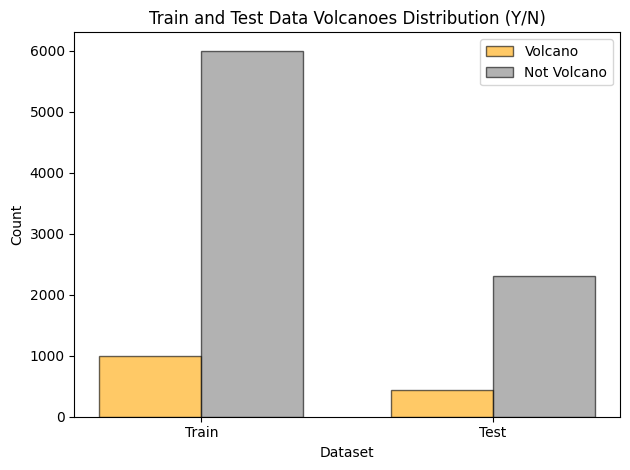

In [78]:
import matplotlib.pyplot as plt
import numpy as np

y_trainVolcanoCount = y_train[y_train["Volcano?"] == 1].shape[0]
y_testVolcanoCount = y_test[y_test["Volcano?"] == 1].shape[0]

y_trainNotVolcanoCount = y_train[y_train["Volcano?"] == 0].shape[0]
y_testNotVolcanoCount = y_test[y_test["Volcano?"] == 0].shape[0]

x = ['Train', 'Test']
y_volcano = [y_trainVolcanoCount, y_testVolcanoCount]
y_not_volcano = [y_trainNotVolcanoCount, y_testNotVolcanoCount]

bar_width = 0.35
x_positions = np.arange(len(x))

plt.bar(x_positions - bar_width / 2, y_volcano, width=bar_width, label='Volcano', color='orange', edgecolor='black', alpha=0.6)
plt.bar(x_positions + bar_width / 2, y_not_volcano, width=bar_width, label='Not Volcano', color='gray', edgecolor='black', alpha=0.6)

# plot
plt.xticks(x_positions, x)
plt.xlabel('Dataset')
plt.ylabel('Count')
plt.title('Train and Test Data Volcanoes Distribution (Y/N)')
plt.legend()
plt.tight_layout()
plt.savefig(f'images/dataset_stats1.png', dpi=300, bbox_inches='tight')
plt.show()

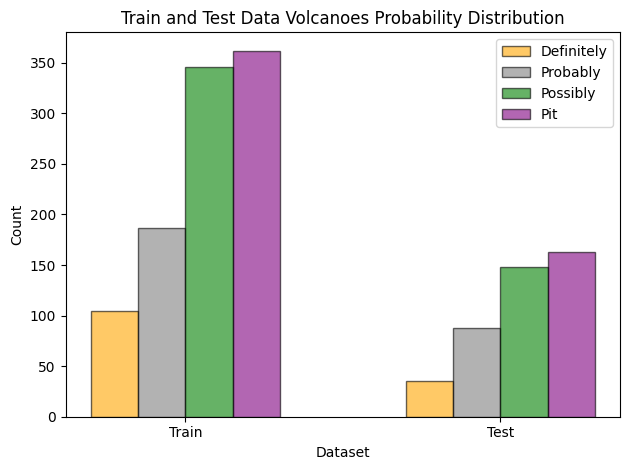

In [79]:
y_trainTypeDefinitelyCount = y_train[y_train["Type"] == 1].shape[0]
y_testTypeDefinitelyCount = y_test[y_test["Type"] == 1].shape[0]

y_trainTypeProbablyCount = y_train[y_train["Type"] == 2].shape[0]
y_testTypeProbablyCount = y_test[y_test["Type"] == 2].shape[0]

y_trainTypePossiblyCount = y_train[y_train["Type"] == 3].shape[0]
y_testTypePossiblyCount = y_test[y_test["Type"] == 3].shape[0]

y_trainTypePitCount = y_train[y_train["Type"] == 4].shape[0]
y_testTypePitCount = y_test[y_test["Type"] == 4].shape[0]

x = ['Train', 'Test']
y1 = [y_trainTypeDefinitelyCount, y_testTypeDefinitelyCount]
y2 = [y_trainTypeProbablyCount, y_testTypeProbablyCount]
y3 = [y_trainTypePossiblyCount, y_testTypePossiblyCount]
y4 = [y_trainTypePitCount, y_testTypePitCount]


bar_width = 0.15
x_positions = np.arange(len(x))

plt.bar(x_positions - 1.5 * bar_width, y1, width=bar_width, label='Definitely', color='orange', edgecolor='black', alpha=0.6)
plt.bar(x_positions - 0.5 * bar_width, y2, width=bar_width, label='Probably', color='gray', edgecolor='black', alpha=0.6)
plt.bar(x_positions + 0.5 * bar_width, y3, width=bar_width, label='Possibly', color='green', edgecolor='black', alpha=0.6)
plt.bar(x_positions + 1.5 * bar_width, y4, width=bar_width, label='Pit', color='purple', edgecolor='black', alpha=0.6)

# plot
plt.xticks(x_positions, x)
plt.xlabel('Dataset')
plt.ylabel('Count')
plt.title('Train and Test Data Volcanoes Probability Distribution')
plt.legend()
plt.tight_layout()
plt.savefig(f'images/dataset_stats2.png', dpi=300, bbox_inches='tight')
plt.show()

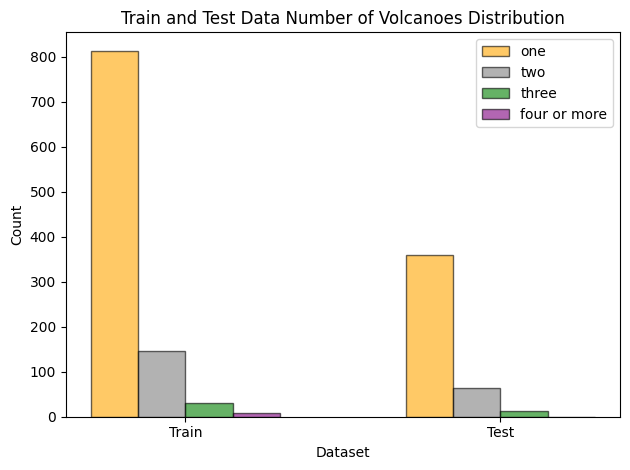

In [80]:
y_trainNumberVolcanoesOnelyCount = y_train[y_train["Number Volcanoes"] == 1].shape[0]
y_testNumberVolcanoesOneCount = y_test[y_test["Number Volcanoes"] == 1].shape[0]

y_trainNumberVolcanoesTwoCount = y_train[y_train["Number Volcanoes"] == 2].shape[0]
y_testNumberVolcanoesTwoCount = y_test[y_test["Number Volcanoes"] == 2].shape[0]

y_trainNumberVolcanoesThreeCount = y_train[y_train["Number Volcanoes"] == 3].shape[0]
y_testNumberVolcanoesThreeCount = y_test[y_test["Number Volcanoes"] == 3].shape[0]

y_trainNumberVolcanoesFourCount = y_train[y_train["Number Volcanoes"] >= 4].shape[0]
y_testNumberVolcanoesFourCount = y_test[y_test["Number Volcanoes"] >= 4].shape[0]

x = ['Train', 'Test']
y1 = [y_trainNumberVolcanoesOnelyCount, y_testNumberVolcanoesOneCount]
y2 = [y_trainNumberVolcanoesTwoCount, y_testNumberVolcanoesTwoCount]
y3 = [y_trainNumberVolcanoesThreeCount, y_testNumberVolcanoesThreeCount]
y4 = [y_trainNumberVolcanoesFourCount, y_testNumberVolcanoesFourCount]

bar_width = 0.15
x_positions = np.arange(len(x))

plt.bar(x_positions - 1.5 * bar_width, y1, width=bar_width, label='one', color='orange', edgecolor='black', alpha=0.6)
plt.bar(x_positions - 0.5 * bar_width, y2, width=bar_width, label='two', color='gray', edgecolor='black', alpha=0.6)
plt.bar(x_positions + 0.5 * bar_width, y3, width=bar_width, label='three', color='green', edgecolor='black', alpha=0.6)
plt.bar(x_positions + 1.5 * bar_width, y4, width=bar_width, label='four or more', color='purple', edgecolor='black', alpha=0.6)

# plot
plt.xticks(x_positions, x)
plt.xlabel('Dataset')
plt.ylabel('Count')
plt.title('Train and Test Data Number of Volcanoes Distribution')
plt.legend()
plt.tight_layout()
plt.savefig(f'images/dataset_stats3.png', dpi=300, bbox_inches='tight')
plt.show()

### Single visualization

In [81]:
#Reshape 
X_test_vis = X_test.values.reshape((X_test.shape[0],1,110,110)) 
X_train_vis = X_train.values.reshape((X_train.shape[0],1,110,110))
print(X_train_vis.shape)

(7000, 1, 110, 110)


In [82]:
#preprocess
X_test_vis = X_test_vis/255.0
X_train_vis = X_train_vis/255.0
#Transpose to tensorflow dimension.
X_test_vis = X_test_vis.transpose([0,2, 3, 1])
X_train_vis = X_train_vis.transpose([0,2, 3, 1])
print(X_train_vis.shape)

(7000, 110, 110, 1)


In [83]:
import matplotlib.pyplot as plt
import numpy as np

label_names = ["No", "Yes"]

def visualize(X, Y, save_path=None):
    # Randomly select an example
    n = np.random.randint(0, X.shape[0])
    aux = X[n]
    
    # Create a figure and axis
    f, ax = plt.subplots(1, figsize=(8, 3))
    ax.set_title("Volcano?: %s" % (label_names[Y["Volcano?"][n]]))

    # Display the image with copper colormap
    ax.imshow(aux[:, :, 0], cmap='copper')  # One channel
    ax.set_yticks([])
    ax.set_xticks([])
    
    # Save the figure if a path is provided
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')

    # Show the plot
    plt.show()
    
    # Print details about the selected example
    print("Detail:", Y.loc[n, :])

# Example usage:
# visualize(X, Y, save_path="example_volcano.png")


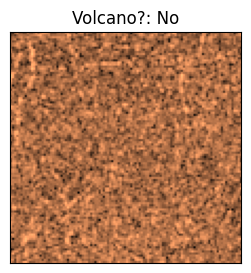

Detail: Volcano?            0.0
Type                NaN
Radius              NaN
Number Volcanoes    NaN
Name: 3578, dtype: float64


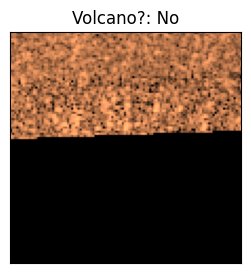

Detail: Volcano?            0.0
Type                NaN
Radius              NaN
Number Volcanoes    NaN
Name: 2656, dtype: float64


In [84]:
visualize(X_train_vis, y_train, save_path="images/example1_volcano.png")
visualize(X_train_vis, y_train, save_path="images/example2_volcano.png")

### Visualization

In [85]:
import warnings

y_train_copy = y_train.copy(deep=True)
X_train_copy = X_train.copy(deep=True)

X_train_copy = np.resize(X_train_copy, (7000, 110, 110))

y_train_copy.loc[y_train_copy["Type"] == 1, 'Type'] = "Definitely Volcano"
y_train_copy.loc[y_train_copy["Type"] == 2, 'Type'] = "Probably Volcano"
y_train_copy.loc[y_train_copy["Type"] == 3, 'Type'] = "Possibly Volcano"
y_train_copy.loc[y_train_copy["Type"] == 4, 'Type'] = "Only Pit is Visible"

y_train_copy.loc[y_train_copy["Volcano?"] == 0, 'Volcano?'] = "Not Volcano"
y_train_copy.loc[y_train_copy["Volcano?"] == 1, 'Volcano?'] = "Volcano"

y_train_copy.loc[y_train_copy["Number Volcanoes"] == 1, 'Number Volcanoes'] = "One Volcano"
y_train_copy.loc[y_train_copy["Number Volcanoes"] == 2, 'Number Volcanoes'] = "Two Volcano"
y_train_copy.loc[y_train_copy["Number Volcanoes"] == 3, 'Number Volcanoes'] = "Three or More Volcano"
y_train_copy.loc[y_train_copy["Number Volcanoes"] == 4, 'Number Volcanoes'] = "Three or More Volcano"
y_train_copy.loc[y_train_copy["Number Volcanoes"] == 5, 'Number Volcanoes'] = "Three or More Volcano"

/var/folders/mh/vygn38qn06z8b_ms648150t80000gn/T/ipykernel_19538/1980578206.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Definitely Volcano' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  y_train_copy.loc[y_train_copy["Type"] == 1, 'Type'] = "Definitely Volcano"
/var/folders/mh/vygn38qn06z8b_ms648150t80000gn/T/ipykernel_19538/1980578206.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Not Volcano' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  y_train_copy.loc[y_train_copy["Volcano?"] == 0, 'Volcano?'] = "Not Volcano"
/var/folders/mh/vygn38qn06z8b_ms648150t80000gn/T/ipykernel_19538/1980578206.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'O

In [86]:
from matplotlib import pyplot as plt

def draw_images(feature, cmap="copper"):
    featureTypes = (y_train_copy.groupby([feature])[feature].nunique()).index
    n_features = min(len(featureTypes), 3)  # Adjust dynamically for up to 3 feature types
    f, ax = plt.subplots(1, n_features, figsize=(4 * n_features, 6))
    
    if n_features == 1:
        ax = [ax]
    
    for i, typ in enumerate(featureTypes[:n_features]):
        sample = y_train_copy[y_train_copy[feature] == typ].sample(1)
        imageIndex = sample.iloc[0].name
        image = X_train_copy[imageIndex]
        ax[i].imshow(image, resample=True, cmap=cmap)
        ax[i].set_title(typ, fontsize=13)
        ax[i].axis("off")
    
    plt.tight_layout()
    plt.show()


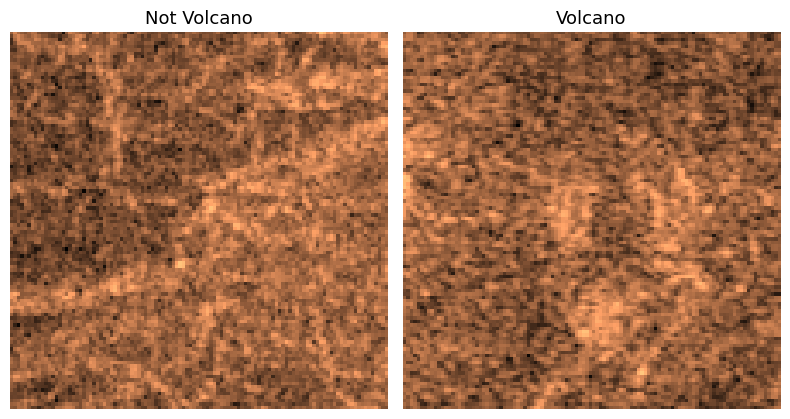

In [87]:
draw_images("Volcano?")

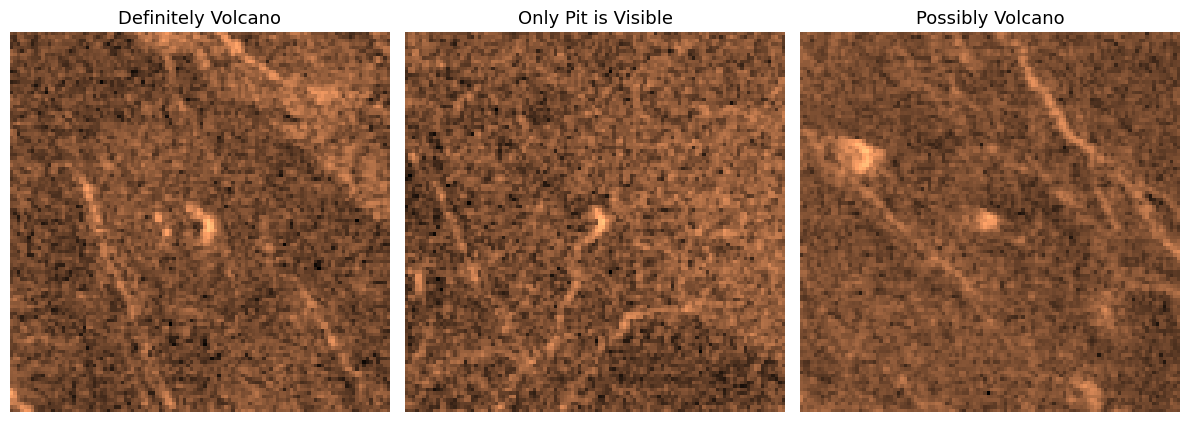

In [88]:
draw_images("Type")

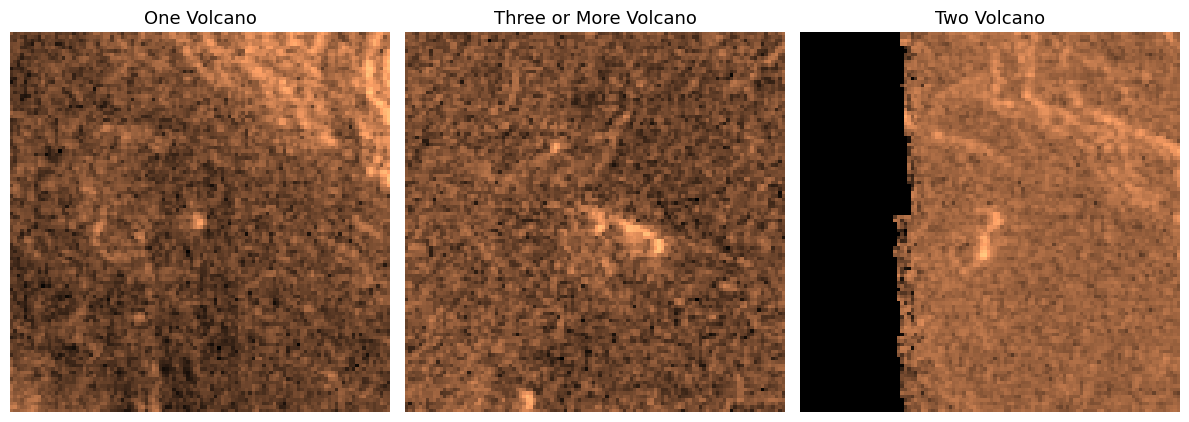

In [89]:
draw_images("Number Volcanoes")

### CNN models

In [90]:
from sklearn.model_selection import train_test_split
# we want to implement the valuation split so we divide the test set by 50%

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=2024)
print("%70\tX_train ->",X_train.shape,"\n\ty_train ->",y_train.shape,
      "\n\n%15\tX_test ->",X_test.shape,"\n\ty_test ->",y_test.shape,
      "\n\n%15\tX_val ->",X_val.shape,"\n\ty_val ->",y_val.shape)

%70	X_train -> (7000, 12100) 
	y_train -> (7000, 4) 

%15	X_test -> (1367, 12100) 
	y_test -> (1367, 4) 

%15	X_val -> (1367, 12100) 
	y_val -> (1367, 4)


In [91]:
# resizing for keras, we want to specify the color channel
X_test = np.resize(X_test, (1367, 110, 110, 1)) # 110 x 110 x 1 = 12100
X_train = np.resize(X_train, (7000, 110, 110, 1))
X_val = np.resize(X_val, (1367, 110, 110, 1))

print("%70\tX_train ->",X_train.shape,"\n\ty_train ->",y_train.shape,
      "\n\n%15\tX_test ->",X_test.shape,"\n\ty_test ->",y_test.shape,
      "\n\n%15\tX_val ->",X_val.shape,"\n\ty_val ->",y_val.shape)

%70	X_train -> (7000, 110, 110, 1) 
	y_train -> (7000, 4) 

%15	X_test -> (1367, 110, 110, 1) 
	y_test -> (1367, 4) 

%15	X_val -> (1367, 110, 110, 1) 
	y_val -> (1367, 4)


In [92]:
# focus only to this variable (Y/n), binary classification
y_train = y_train["Volcano?"]
y_test = y_test["Volcano?"]
y_val = y_val["Volcano?"]

In [93]:
# we need to normalize our pixels from 0-255 to 0-1. But why we do this?
# The goal of normalization is to change the values of numeric columns in the dataset to use a common scale,
# without distorting differences in the ranges of values or losing information.
X_train = X_train / 255.0
X_test = X_test / 255.0
X_val = X_val / 255.0

In [94]:
# pip install --upgrade tensorflow keras

In [95]:
from tensorflow.keras.utils import to_categorical # convert to one-hot-encoding
y_train = to_categorical(y_train, num_classes = 2)
y_test = to_categorical(y_test, num_classes = 2)
y_val = to_categorical(y_val, num_classes = 2)

In [96]:
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout
from keras.optimizers import Adam

modelA = Sequential()
modelA.add(Conv2D(filters = 8, kernel_size = (5,5), activation ='relu', input_shape = (110,110,1)))
modelA.add(MaxPool2D(pool_size=(2,2)))
modelA.add(Conv2D(filters = 16, kernel_size = (3,3), activation ='relu'))
modelA.add(MaxPool2D(pool_size=(2,2)))
modelA.add(Flatten())
modelA.add(Dense(y_train.shape[1], activation = "sigmoid"))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [97]:
# view the model in HTML version, in paper use this PNG version
modelA.save("images/netron_graphs/modelA.h5")

# -> console: netron modelA.h5 

In [98]:
# from tensorflow.keras.utils import plot_model

# plot_model(
#     modelA,
#     to_file='modelA_plot.png',
#     show_shapes=True,                 # Mostra le forme degli input/output
#     show_layer_names=True,            # Mostra i nomi dei layer
#     dpi=80,                          # Aumenta i punti per pollice (immagine più compatta)
#     rankdir='TB'                      # Direzione dall'alto al basso
# )

In [99]:
modelA.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 106, 106, 8)    │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 53, 53, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 51, 51, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 25, 25, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 10000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │        20,002 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,378 (83.51 KB)

 Trainable params: 21,378 (83.51 KB)

 Non-trainable params: 0 (0.00 B)

In [100]:
modelA.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Training

Model A

In [ ]:
# modelA_trained = modelA.fit(X_train, y_train, batch_size=64, epochs = 25, validation_data = (X_val,y_val))
# modelA.save("ModelTrained/modelA_trained.h5")

Epoch 1/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 21s 167ms/step - accuracy: 0.8215 - loss: 0.4368 - val_accuracy: 0.8420 - val_loss: 0.4390
Epoch 2/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 18s 162ms/step - accuracy: 0.8585 - loss: 0.4043 - val_accuracy: 0.8420 - val_loss: 0.4229
Epoch 3/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 20s 186ms/step - accuracy: 0.8570 - loss: 0.3967 - val_accuracy: 0.8420 - val_loss: 0.4051
Epoch 4/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 23s 208ms/step - accuracy: 0.8556 - loss: 0.3770 - val_accuracy: 0.8500 - val_loss: 0.3431
Epoch 5/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 29s 259ms/step - accuracy: 0.8848 - loss: 0.2859 - val_accuracy: 0.9129 - val_loss: 0.2582
Epoch 6/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 29s 241ms/step - accuracy: 0.9168 - loss: 0.2335 - val_accuracy: 0.9056 - val_loss: 0.2334
Epoch 7/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 20s 179ms/step - accuracy: 0.9317 - loss: 0.1918 - val_accuracy: 0.9312 - val_loss: 0.1909
Epoch 8/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 20s 179ms/step - accuracy: 0.9412 - loss: 0

In [119]:
from tensorflow.keras.models import load_model

modelA = load_model("ModelTrained/modelA_trained.h5")

In [102]:
print(modelA.history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


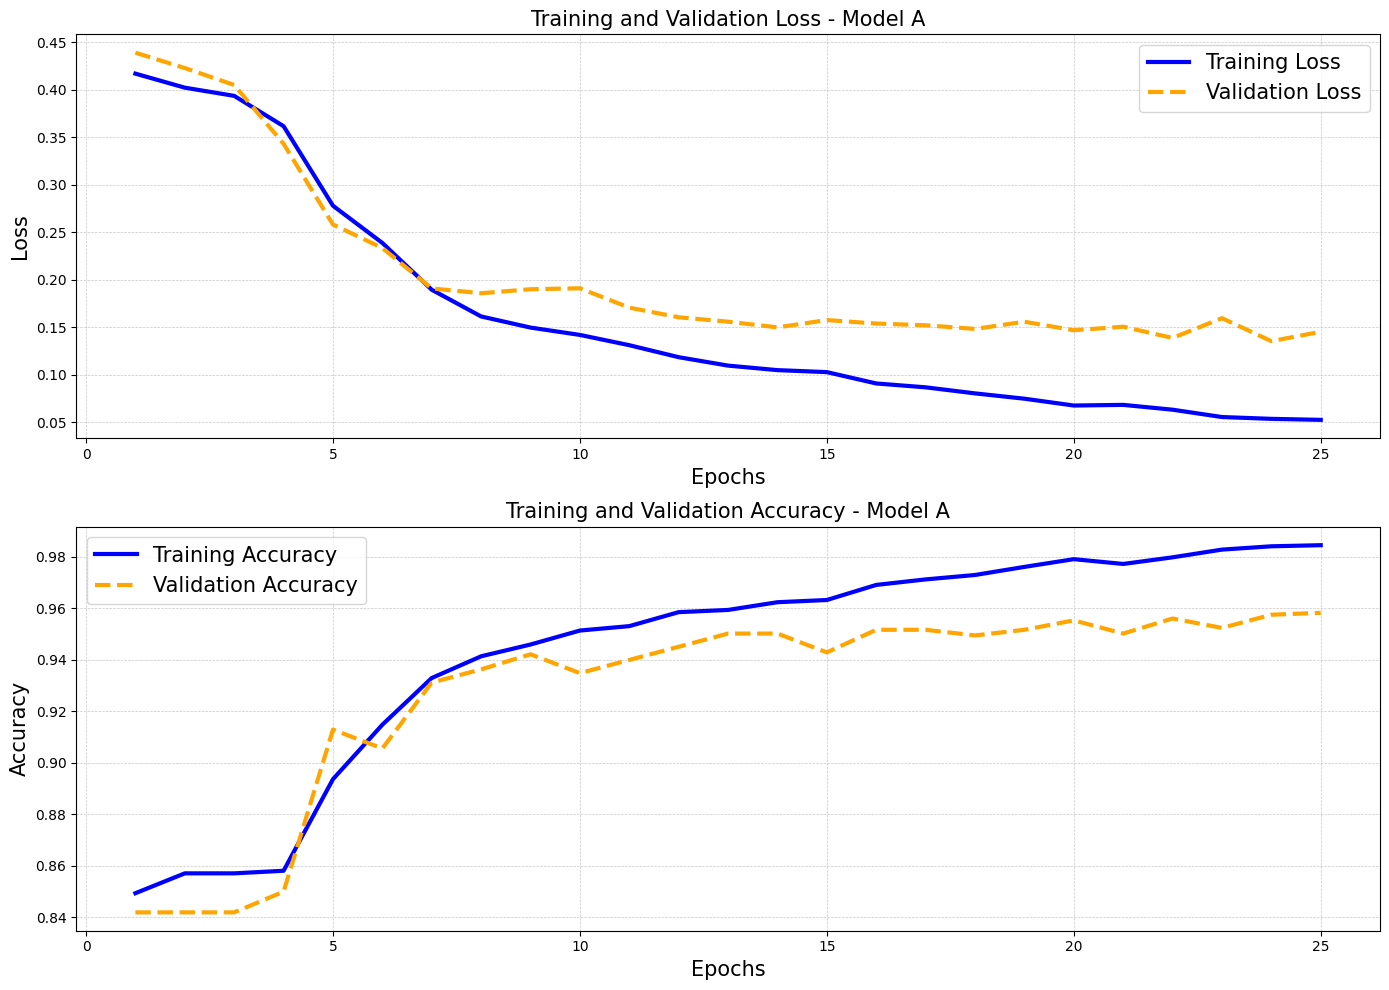

In [103]:
from methods import *
training_results_graph(modelA_trained, 'A')

In [104]:
scoreA = modelA.evaluate(X_test, y_test)
print('Test Loss ->', scoreA[0])
print('Test Accuracy ->', scoreA[1])

43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9581 - loss: 0.1398
Test Loss -> 0.13915030658245087
Test Accuracy -> 0.9590343832969666


In [139]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc_curve_multilabel(model, X_test, y_test, model_code, label_names=None):
    """
    Plots ROC curves for each label in a multi-label classification task.

    Parameters:
    - model: Trained model (must have predict_proba or predict method)
    - X_test: Test data features
    - y_test: True labels for the test data (multi-label, one-hot encoded)
    - model_code: Code or name for the model (used in title and file naming)
    - label_names: List of label names (optional, for plot legend)
    """
    # Get predicted probabilities for each label
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)
    else:
        y_pred_proba = model.predict(X_test)

    n_classes = y_test.shape[1]
    plt.figure(figsize=(10, 7))

    for i in range(n_classes):
        # Compute ROC curve and AUC for each label
        fpr, tpr, _ = roc_curve(y_test[:, i], y_pred_proba[:, i])
        roc_auc = auc(fpr, tpr)
        
        label = label_names[i] if label_names else f'Class {i}'
        plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})', linewidth=3)

    # Plot random classifier line
    plt.plot([0, 1], [0, 1], color='red', linestyle='--', linewidth=3, label='Random Classifier')
    plt.title(f'ROC Curve - Model {model_code}', fontsize=15)
    plt.xlabel('False Positive Rate (FPR)', fontsize=15)
    plt.ylabel('True Positive Rate (TPR)', fontsize=15)
    plt.legend(fontsize=12, loc='lower right')
    plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

    # Save the figure with high resolution
    plt.savefig(f'images/Model{model_code}_roc_curve.png', dpi=300, bbox_inches='tight')

    plt.show()


42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


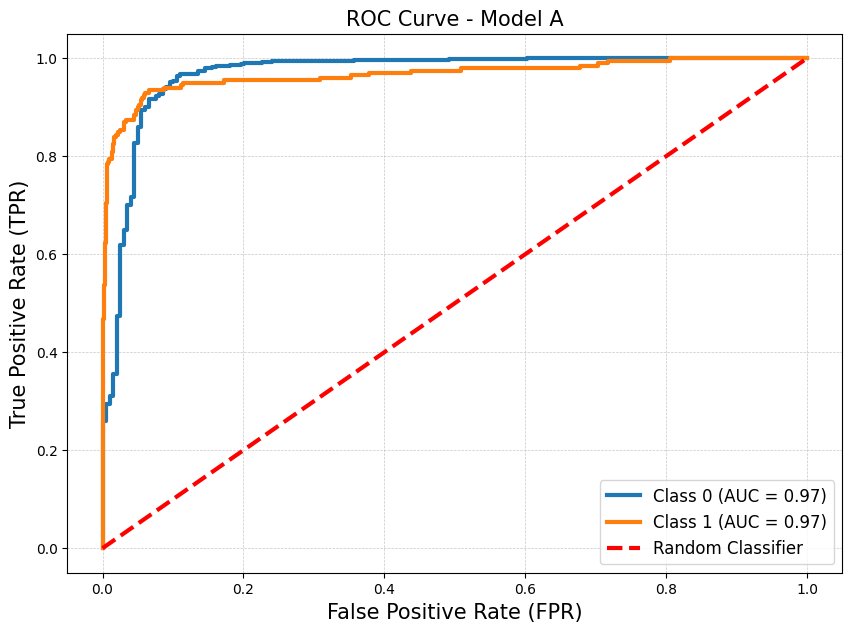

In [140]:
plot_roc_curve_multilabel(modelA, X_test, y_test, model_code="A")

Model B

Introduce dropout layers and implement data cleaning.
Our dataset contains some blank or corrupted images, including completely black ones, which can degrade model performance. To address this, we aim to filter out these problematic images.
Detecting fully black images is straightforward, but identifying partially corrupted images is more challenging.
To resolve this, we analyze sequences of black pixels across all images. Specifically, any image containing a series of black pixels longer than 10 pixels is removed.
The process involves flattening the images into 1D arrays, then summing the pixel values in chunks of 10 pixels. If the sum of a chunk equals zero, it indicates corruption in that part of the image.

However, there’s a notable limitation with this approach: if corruption starts from the top edge of the image, my method might fail. This occurs because every 110th pixel in a flattened image could be black, falsely escaping detection.
To overcome this, I adjust the loop to skip pixels more strategically by setting the step size (the third parameter in the range function) to 119 pixels. This ensures a more robust detection of corrupted images.

In [120]:
def corruptedImages(data):
    corruptedImagesIndex = []
    for index, image in enumerate(np.resize(data, (data.shape[0], 12100))): # resize (7000, 110, 110, 1) to (7000,12100)
        sum = 0;
        for pixelIndex in range(0,len(image)):
            sum += image[pixelIndex]
            if pixelIndex == 10:
                break
        if sum == 0:
            corruptedImagesIndex.append(index)
        else:
            sum = 0

    for index, image in enumerate(np.resize(data, (data.shape[0], 12100))): # resize (7000, 110, 110, 1) to (7000,12100)
        sum = 0;
        for pixelIndex in range(0,len(image),110):
            sum += image[pixelIndex]
            if pixelIndex == 10:
                break
        if sum == 0 and index not in corruptedImagesIndex:
            corruptedImagesIndex.append(index)
        else:
            sum = 0
    return corruptedImagesIndex
 
print(str(len(corruptedImages(X_train_copy)))+" corrupted images")

209 corrupted images


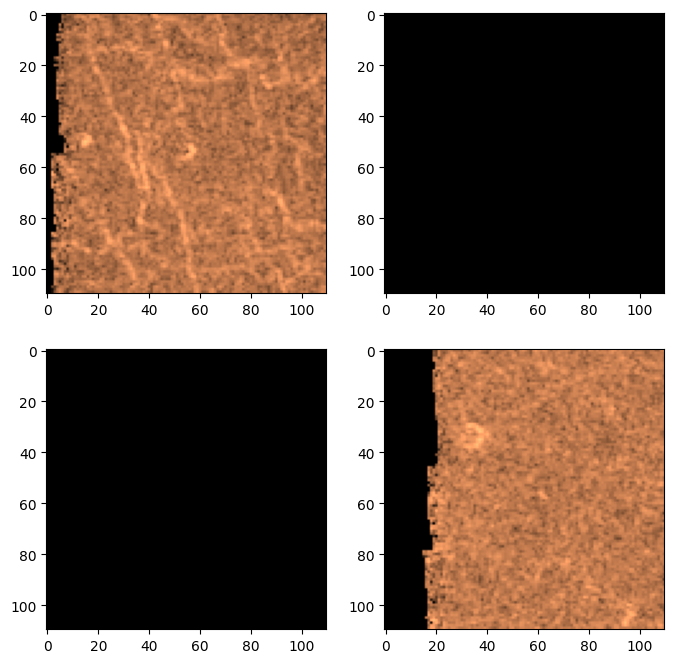

In [121]:
trainCorruptedList = corruptedImages(X_train_copy)

import random
random.shuffle(trainCorruptedList)

f, axarr = plt.subplots(2,2,figsize=(8,8))
for i in range(2):
    for j in range(2):
        axarr[i,j].imshow(X_train_copy[trainCorruptedList[i*2+j]], cmap="copper")

In [122]:
import os
print(os.listdir(path))

X_train = pd.read_csv(os.path.join(path, 'volcanoes_train', 'train_images.csv'))
y_train = pd.read_csv(os.path.join(path, 'volcanoes_train', 'train_labels.csv'))
X_test = pd.read_csv(os.path.join(path, 'volcanoes_test', 'test_images.csv'))
y_test = pd.read_csv(os.path.join(path, 'volcanoes_test', 'test_labels.csv'))

# Fix the column names
XFix(X_train)
XFix(X_test)

def deleteCorrupted(X, y, corruptedIndexList):
    for i in corruptedIndexList:
        X.drop(i, inplace=True) # Drop the corrupted
        y.drop(i, inplace=True) 
    
    X.reset_index(inplace=True) # Reconstruct the index
    X.drop(['index'], axis=1, inplace=True) # Delete old index column
    #Because they are pandas.series we don't need to deal with index
    #Because we use inplace=True we don't need to return something
    
trainCorruptedList = corruptedImages(X_train)
testCorruptedList = corruptedImages(X_test)

deleteCorrupted(X_train, y_train, trainCorruptedList)
deleteCorrupted(X_test, y_test, testCorruptedList)

['Volcanoes_train', 'Volcanoes_test']


In [123]:
print("X_train:\t",X_train.shape,"\ny_train:\t",y_train.shape,"\nX_test:\t\t",X_test.shape,"\ny_test:\t\t",y_test.shape)

X_train:	 (6791, 12100) 
y_train:	 (6791, 4) 
X_test:		 (2655, 12100) 
y_test:		 (2655, 4)


In [124]:
# Get our label
y_train = y_train["Volcano?"]
y_test = y_test["Volcano?"]

# Normalize
X_train = X_train / 255.0
X_test = X_test / 255.0

# One Hot Label encoding
y_train = to_categorical(y_train, num_classes = 2)
y_test = to_categorical(y_test, num_classes = 2)

# Spliting
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=22)

# Lastly resizing
X_test = np.resize(X_test, (X_test.shape[0], 110, 110, 1))
X_train = np.resize(X_train, (X_train.shape[0], 110, 110, 1))
X_val = np.resize(X_val, (X_val.shape[0], 110, 110, 1))

In [125]:
print("%70\tX_train ->",X_train.shape,"\n\ty_train ->",y_train.shape,
      "\n\n%15\tX_test ->",X_test.shape,"\n\ty_test ->",y_test.shape,
      "\n\n%15\tX_val ->",X_val.shape,"\n\ty_val ->",y_val.shape)

%70	X_train -> (6791, 110, 110, 1) 
	y_train -> (6791, 2) 

%15	X_test -> (1327, 110, 110, 1) 
	y_test -> (1327, 2) 

%15	X_val -> (1328, 110, 110, 1) 
	y_val -> (1328, 2)


In [126]:
modelB = Sequential()
modelB.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'same',activation ='relu', input_shape = (110,110,1)))
modelB.add(MaxPool2D(pool_size=(2,2)))
modelB.add(Dropout(0.5))
modelB.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'same',activation ='relu'))
modelB.add(MaxPool2D(pool_size=(2,2)))
modelB.add(Dropout(0.5))
modelB.add(Flatten())
modelB.add(Dense(y_train.shape[1], activation = "sigmoid"))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [127]:
modelB.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 110, 110, 8)    │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 55, 55, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 55, 55, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 55, 55, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 27, 27, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 27, 27, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 11664)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │        23,330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,706 (96.51 KB)

 Trainable params: 24,706 (96.51 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# modelB.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# modelB_trained = modelB.fit(X_train, y_train, batch_size=64, epochs = 25, validation_data = (X_val,y_val))
# modelB.save("ModelTrained/modelB_trained.h5")

Epoch 1/25
107/107 ━━━━━━━━━━━━━━━━━━━━ 19s 160ms/step - accuracy: 0.8511 - loss: 0.4444 - val_accuracy: 0.8245 - val_loss: 0.5352
Epoch 2/25
107/107 ━━━━━━━━━━━━━━━━━━━━ 21s 193ms/step - accuracy: 0.8538 - loss: 0.4153 - val_accuracy: 0.8245 - val_loss: 0.5543
Epoch 3/25
107/107 ━━━━━━━━━━━━━━━━━━━━ 21s 197ms/step - accuracy: 0.8505 - loss: 0.4107 - val_accuracy: 0.8253 - val_loss: 0.5503
Epoch 4/25
107/107 ━━━━━━━━━━━━━━━━━━━━ 26s 240ms/step - accuracy: 0.8584 - loss: 0.3692 - val_accuracy: 0.8727 - val_loss: 0.4233
Epoch 5/25
107/107 ━━━━━━━━━━━━━━━━━━━━ 23s 217ms/step - accuracy: 0.8747 - loss: 0.3184 - val_accuracy: 0.9104 - val_loss: 0.3577
Epoch 6/25
107/107 ━━━━━━━━━━━━━━━━━━━━ 22s 203ms/step - accuracy: 0.8952 - loss: 0.2745 - val_accuracy: 0.9224 - val_loss: 0.2889
Epoch 7/25
107/107 ━━━━━━━━━━━━━━━━━━━━ 22s 204ms/step - accuracy: 0.9176 - loss: 0.2412 - val_accuracy: 0.9194 - val_loss: 0.2473
Epoch 8/25
107/107 ━━━━━━━━━━━━━━━━━━━━ 22s 205ms/step - accuracy: 0.9155 - loss: 0

In [131]:
from tensorflow.keras.models import load_model

modelB = load_model("ModelTrained/modelB_trained.h5")

In [134]:
# view the model in HTML version, in paper use this PNG version
modelB.save("images/netron_graphs/modelB.h5")

# -> console: netron modelA.h5 

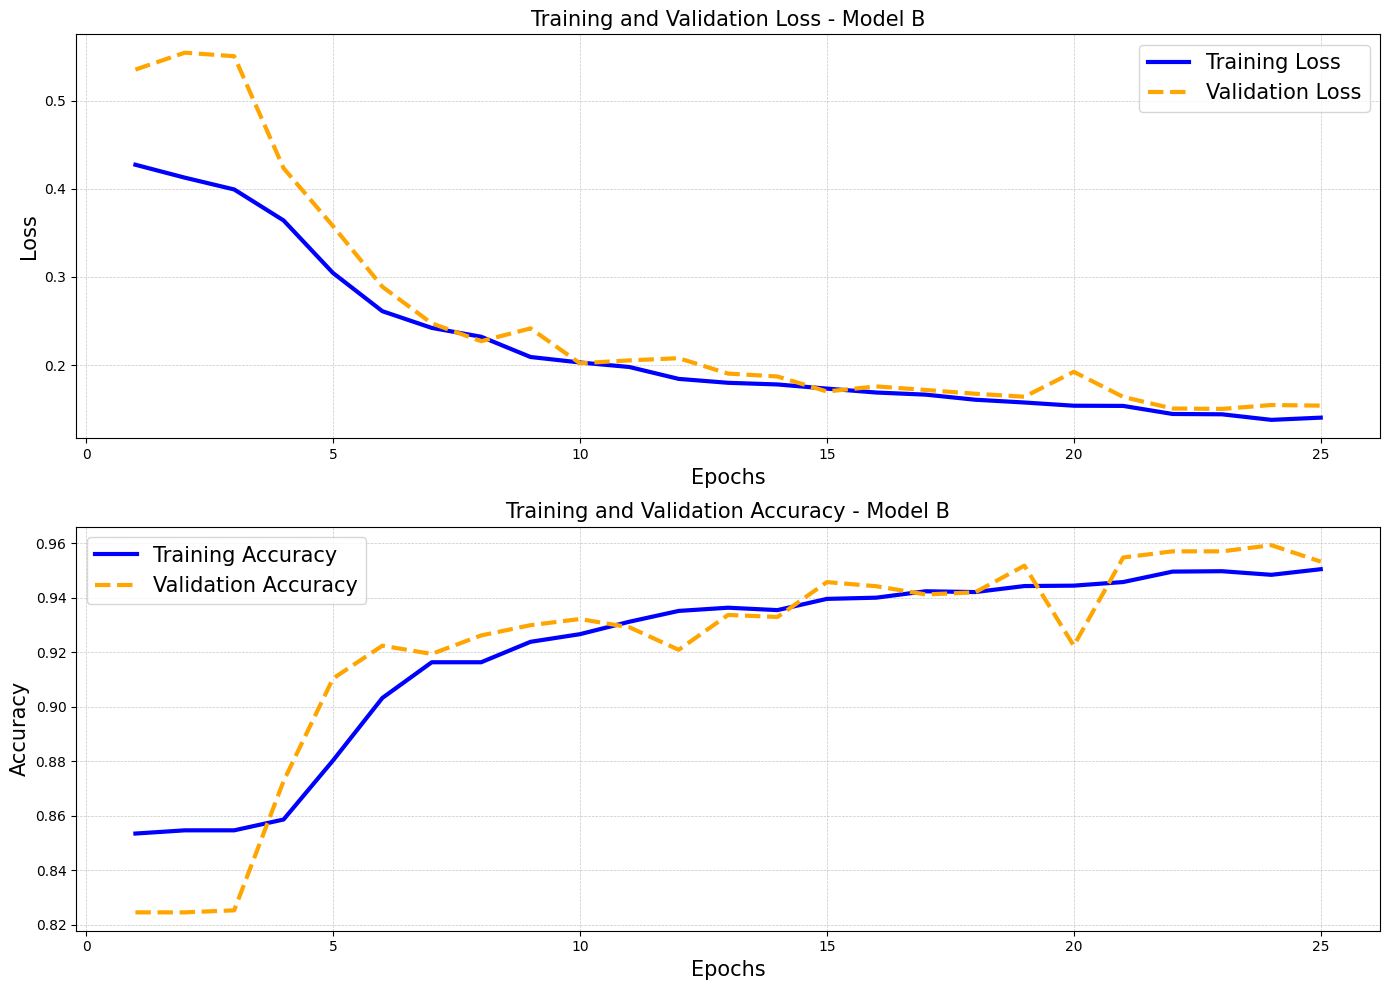

In [135]:
training_results_graph(modelB_trained, 'B')

42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


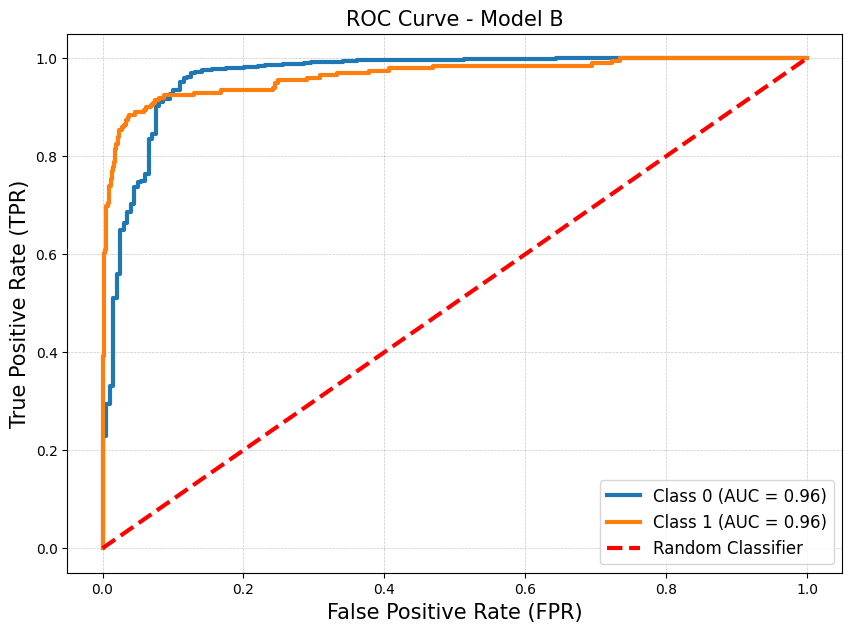

In [141]:
plot_roc_curve_multilabel(modelB, X_test, y_test, model_code="B")

In [142]:
scoreB = modelB.evaluate(X_test, y_test)
print('Test Loss ->', scoreB[0])
print('Test Accuracy ->', scoreB[1])

42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9483 - loss: 0.1523
Test Loss -> 0.15327413380146027
Test Accuracy -> 0.9532780647277832


Model comparison

model comparison within A and B

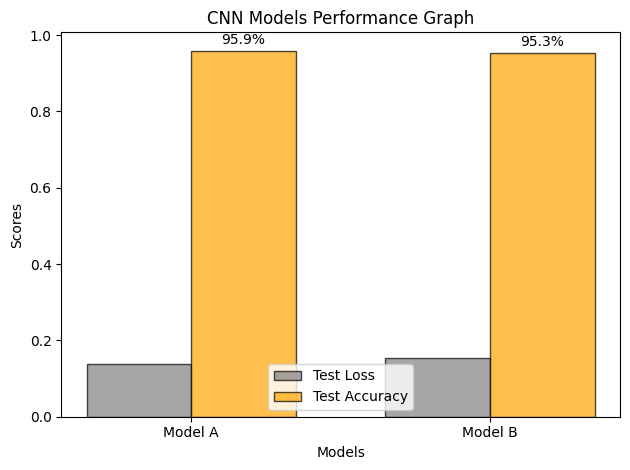

In [143]:
import matplotlib.pyplot as plt
import numpy as np

x = ['Model A', 'Model B']
y = [scoreA[0], scoreB[0]]
y2 = [scoreA[1], scoreB[1]]

# Bar width and positions
bar_width = 0.35
x_positions = np.arange(len(x))

# Create the bar chart
plt.bar(x_positions - bar_width / 2, y, width=bar_width, label='Test Loss', color='grey', edgecolor='black', alpha=0.7)
bars = plt.bar(x_positions + bar_width / 2, y2, width=bar_width, label='Test Accuracy', color='orange', edgecolor='black', alpha=0.7)

for bar, acc in zip(bars, y2):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{acc * 100:.1f}%', 
             ha='center', va='bottom', fontsize=10)
# Plot
plt.xticks(x_positions, x)
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('CNN Models Performance Graph')
plt.legend(loc='lower center')
plt.tight_layout()
plt.savefig(f'images/models_performance.png', dpi=300, bbox_inches='tight')
plt.show()